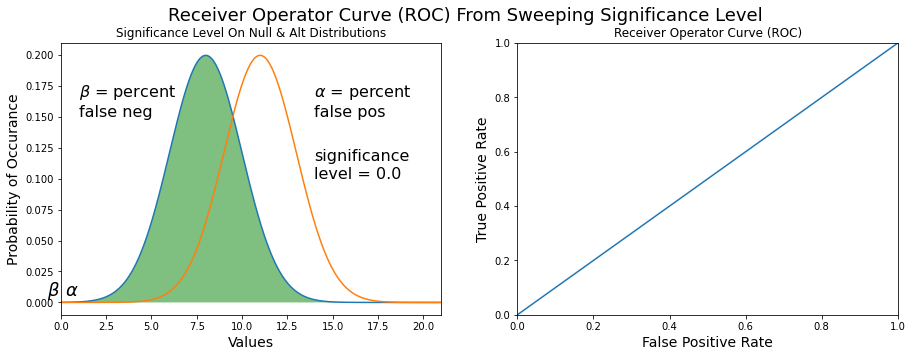

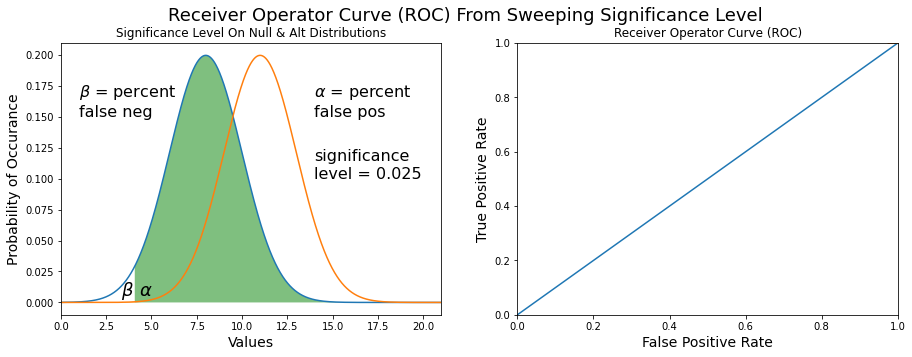

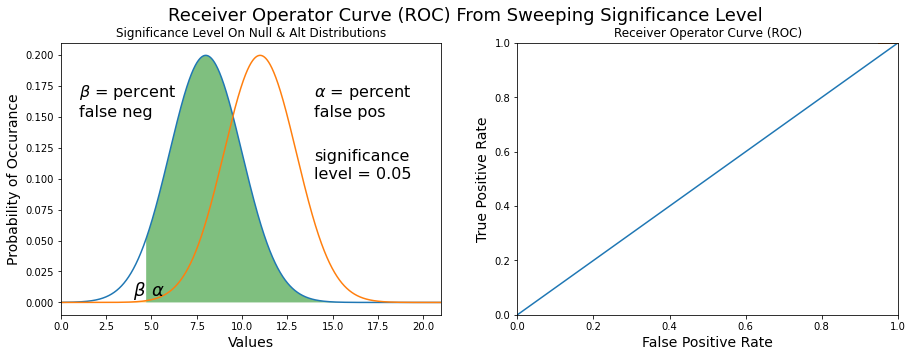

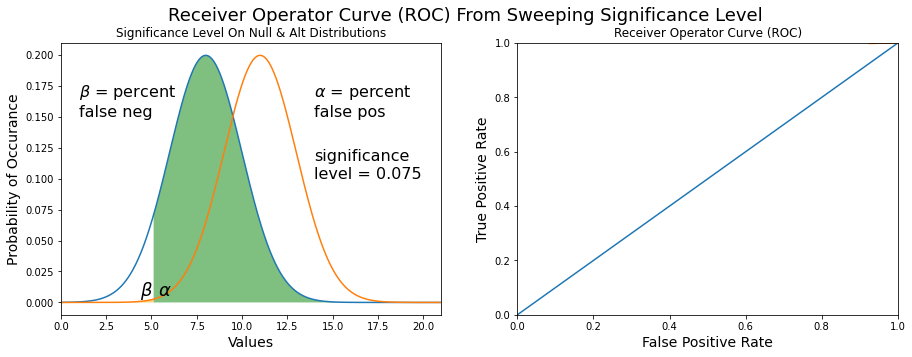

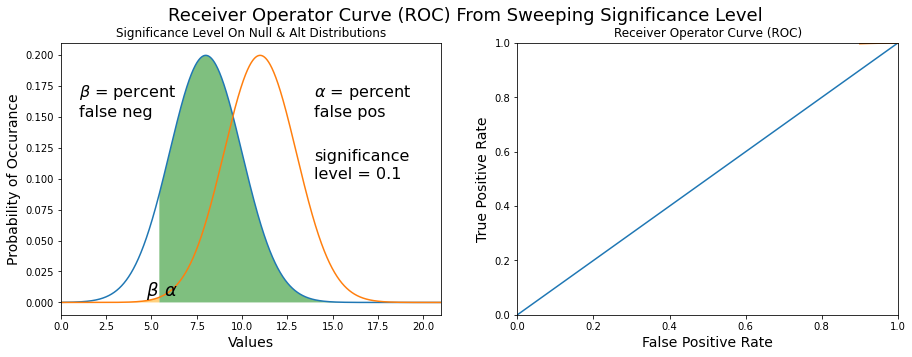

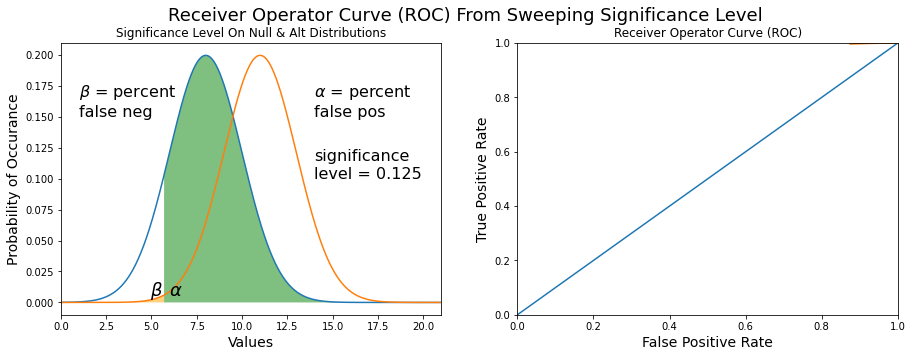

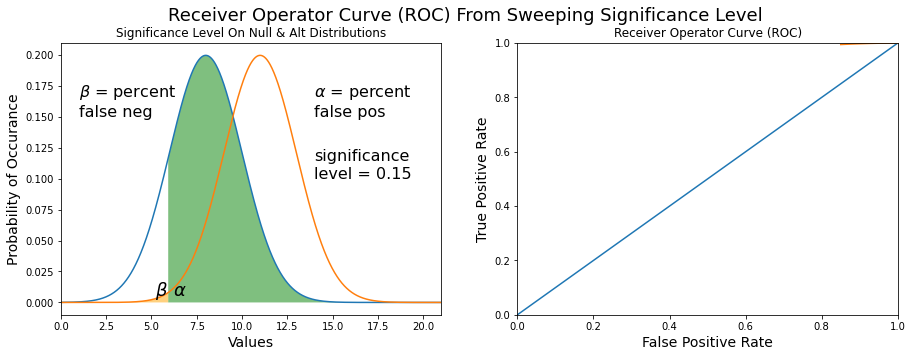

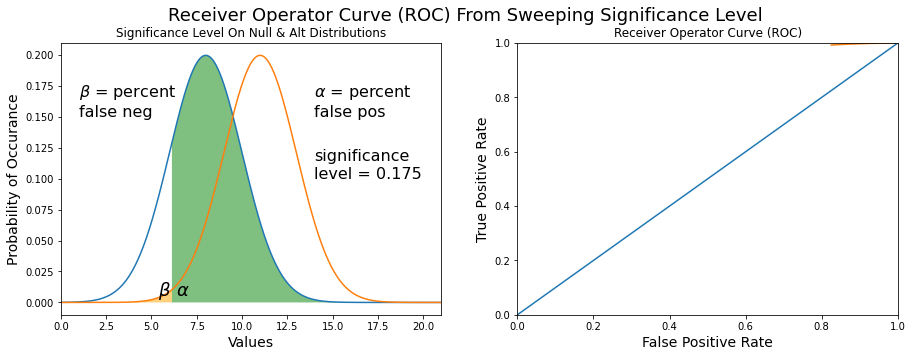

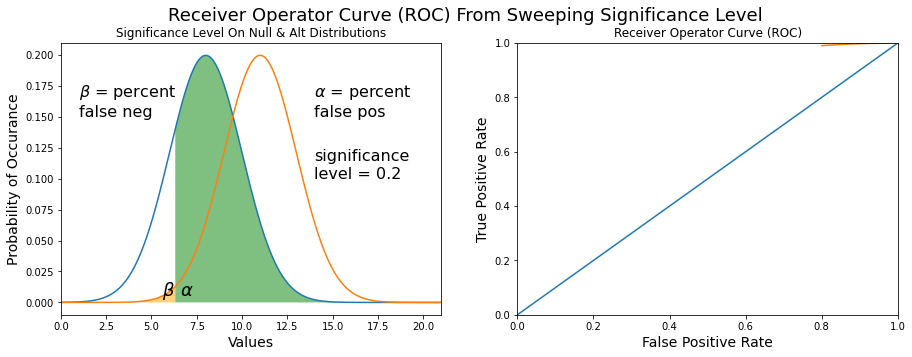

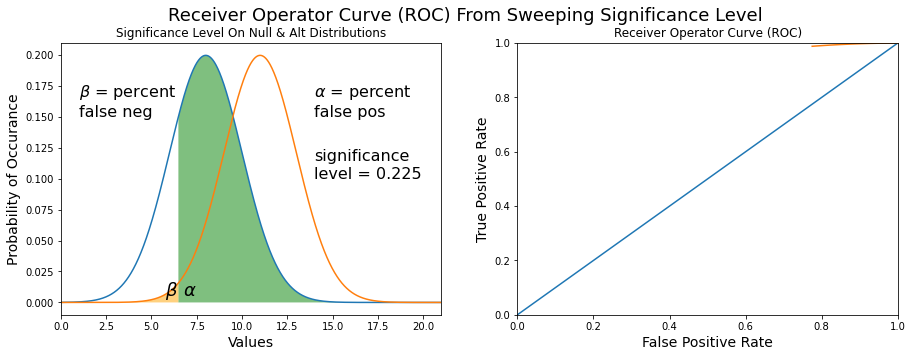

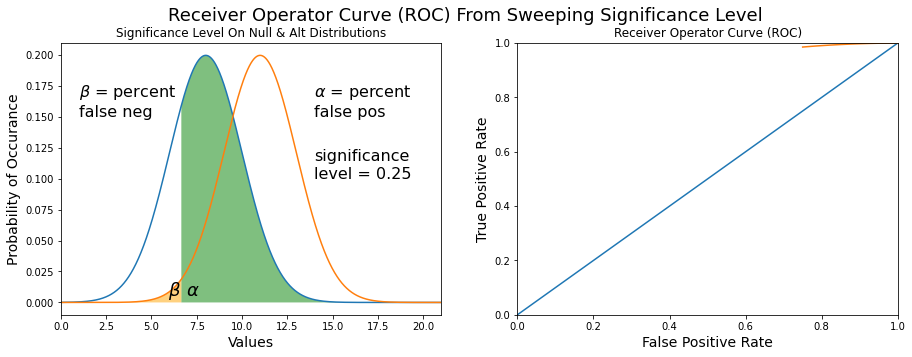

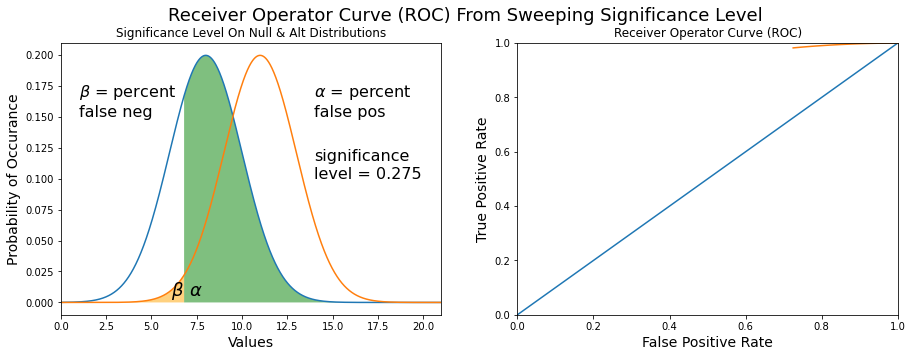

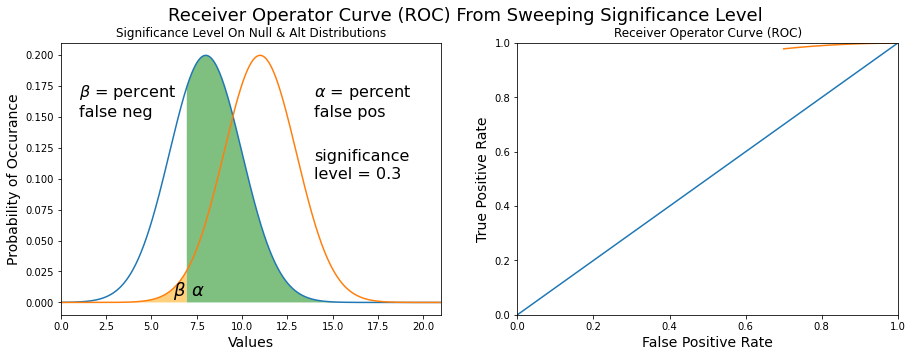

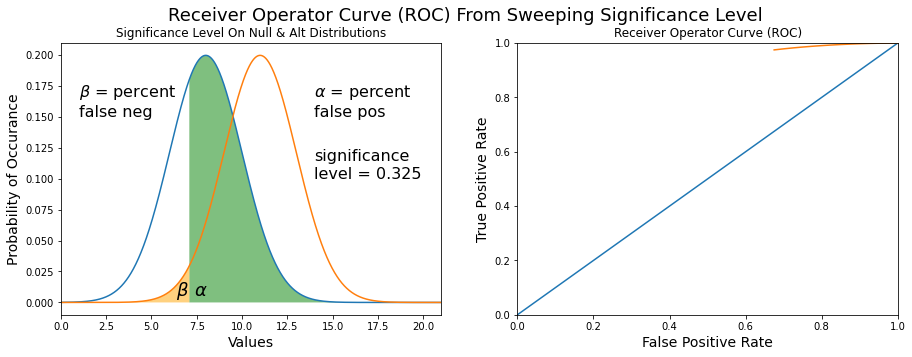

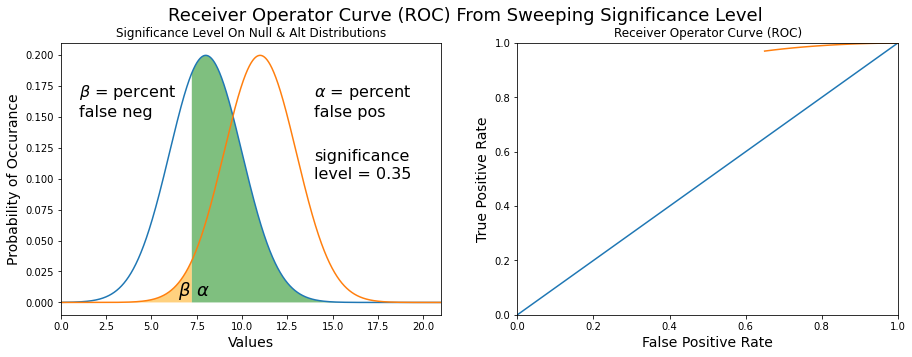

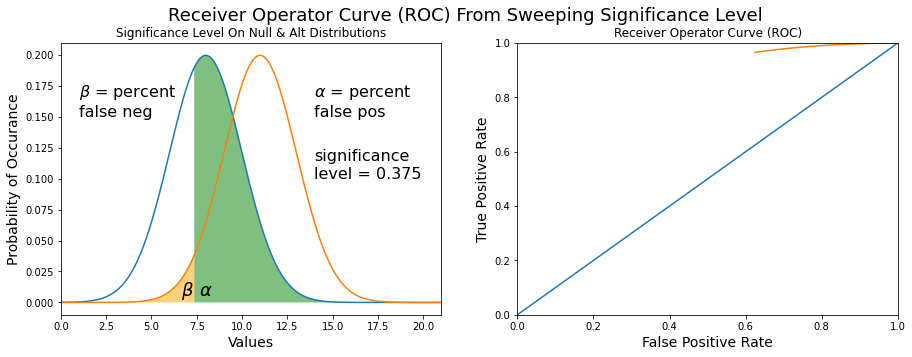

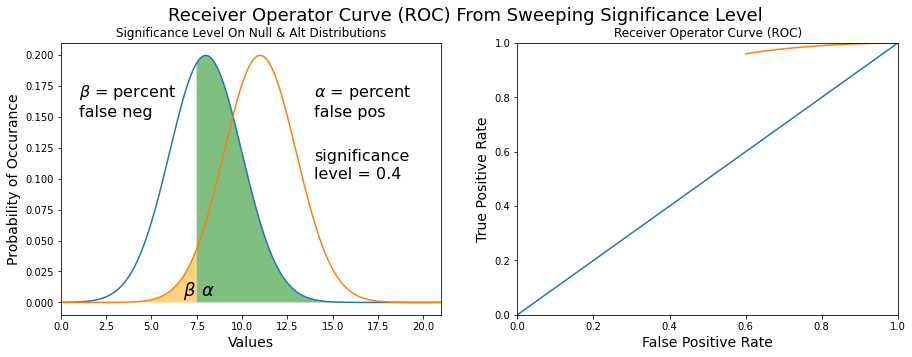

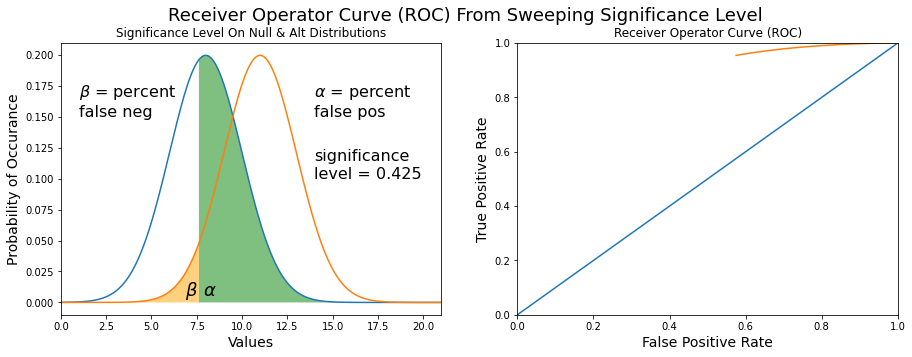

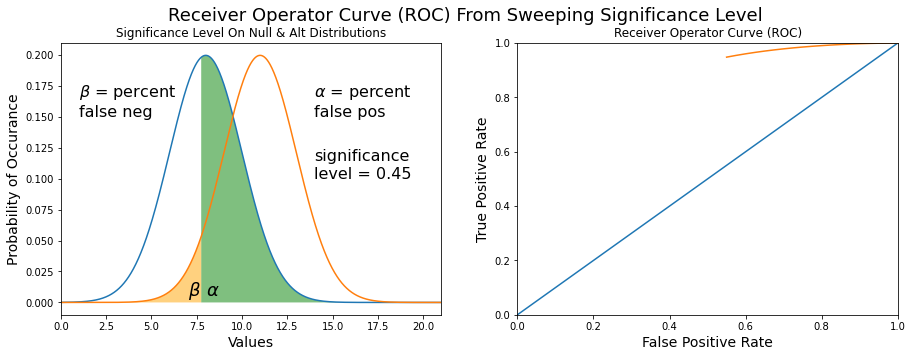

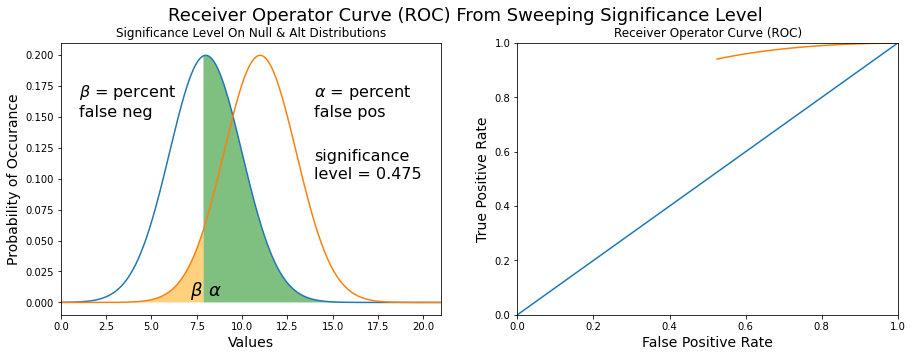

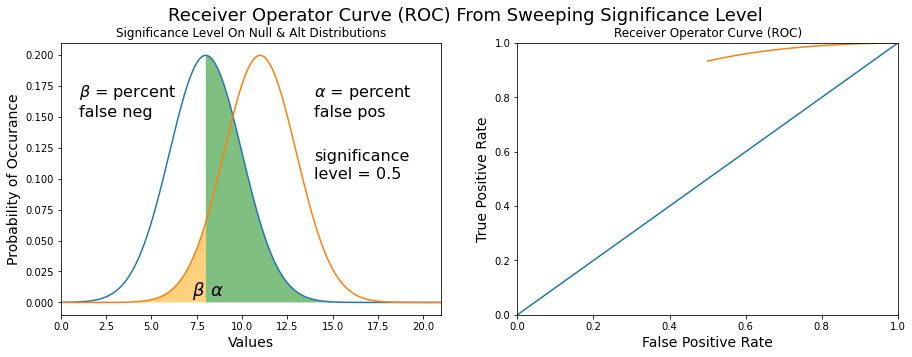

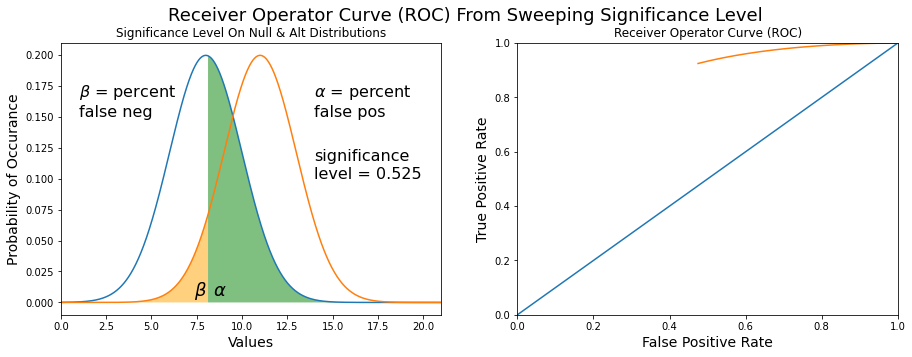

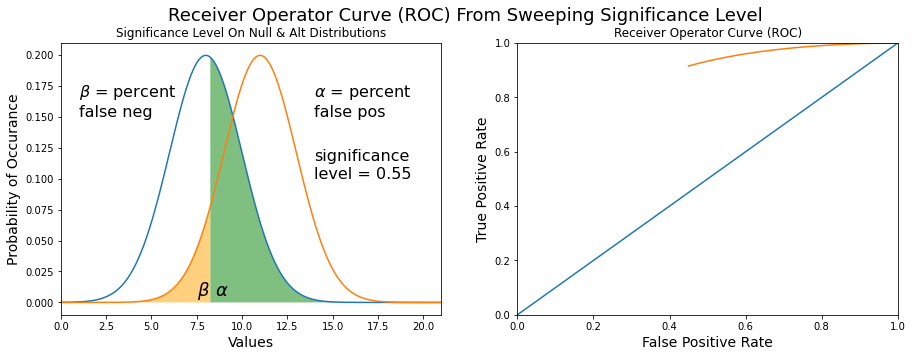

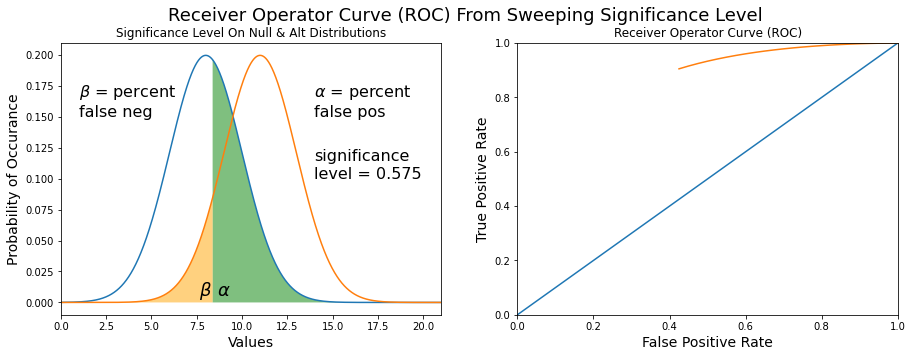

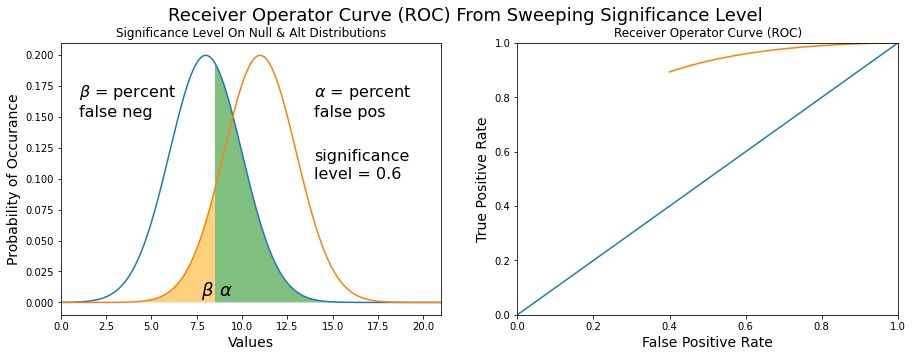

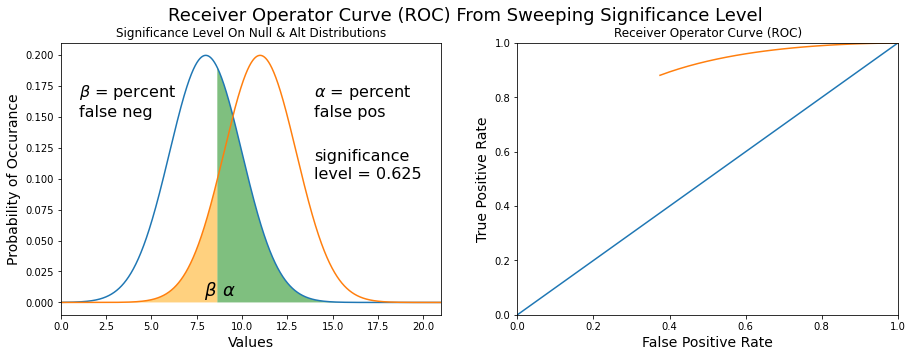

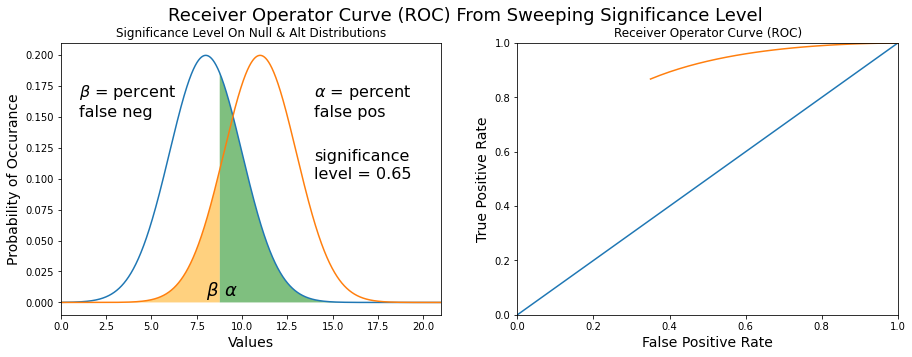

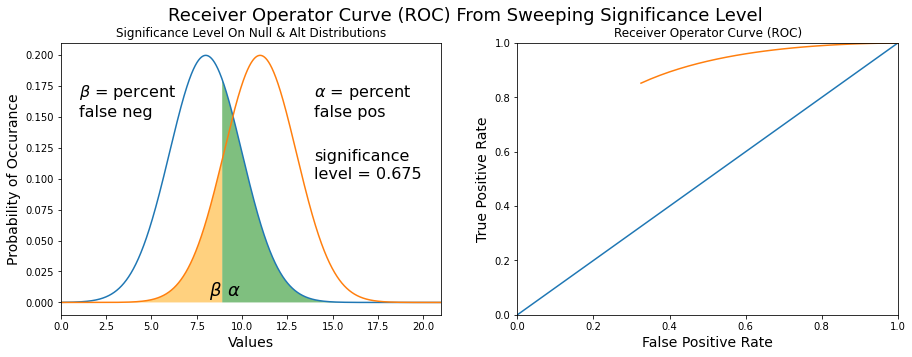

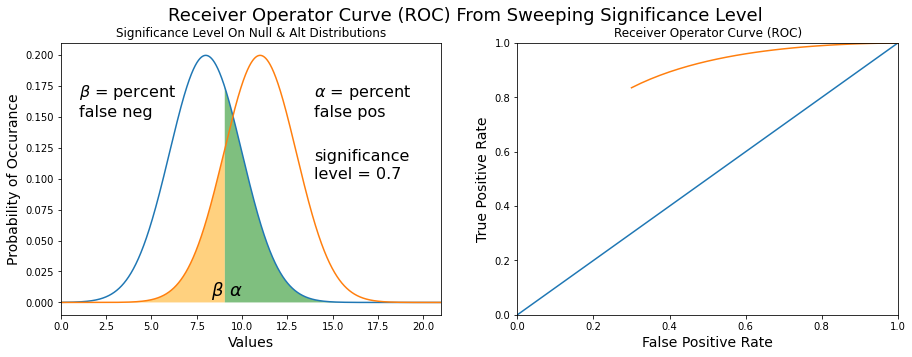

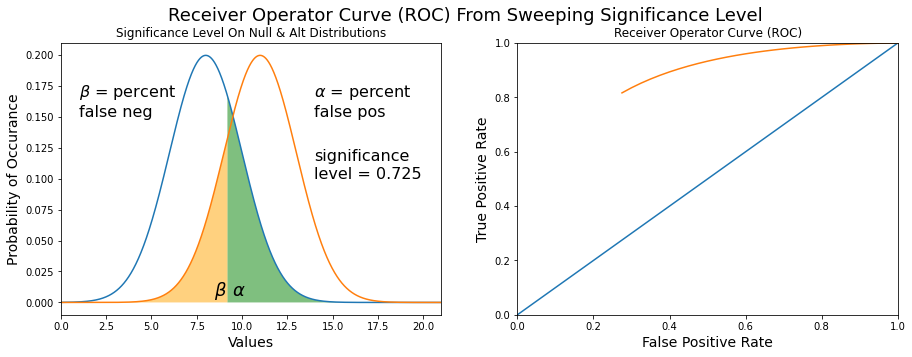

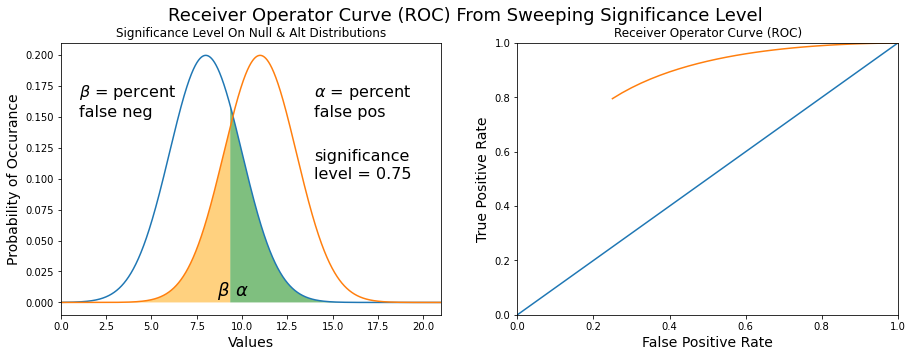

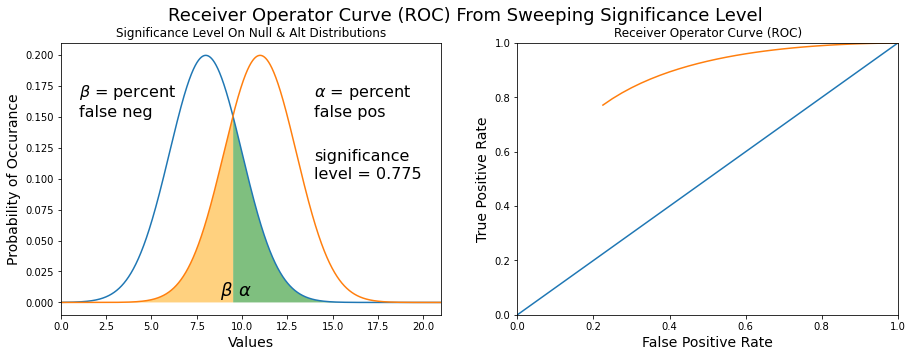

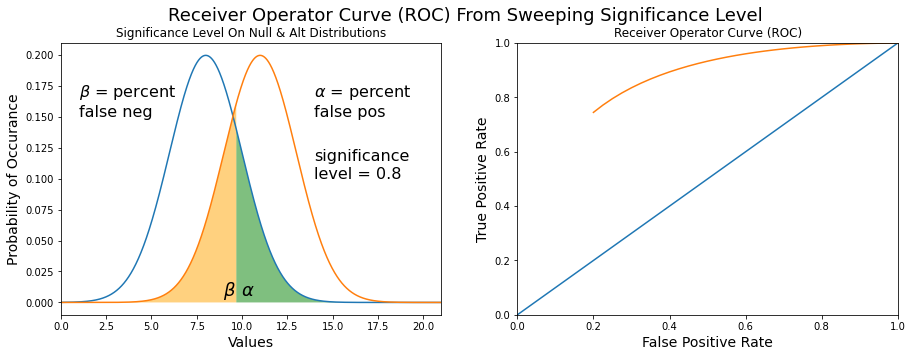

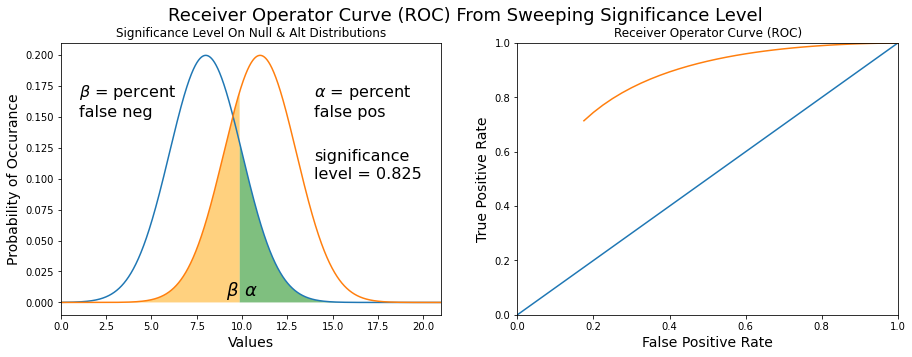

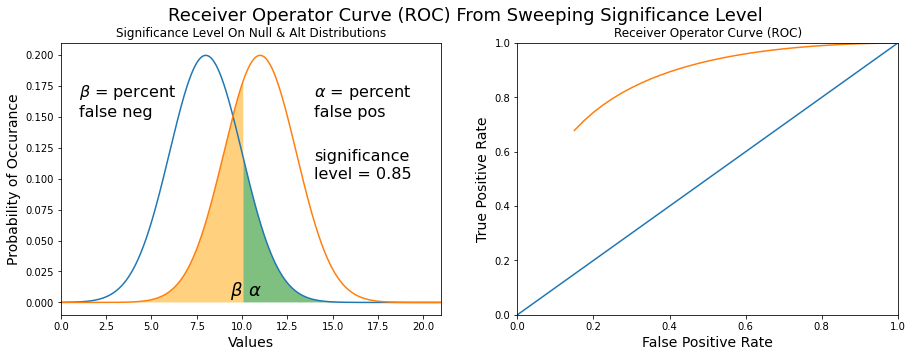

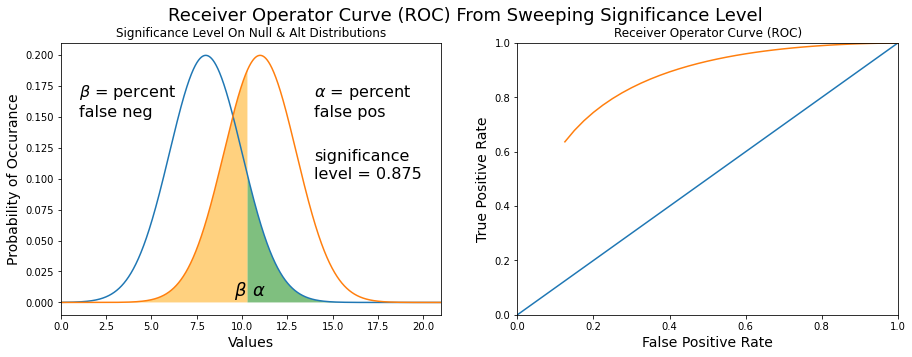

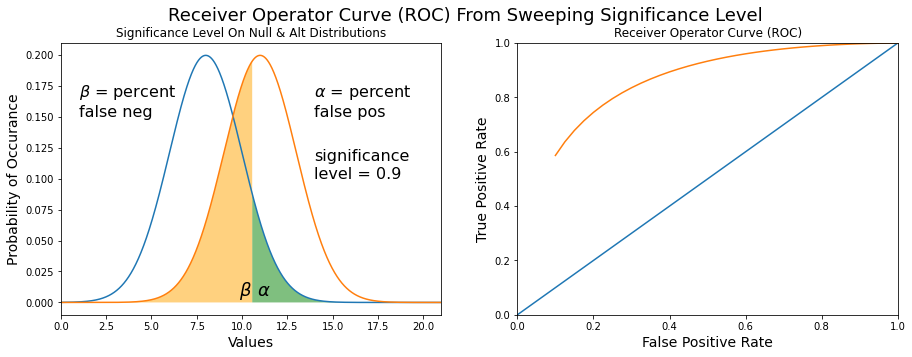

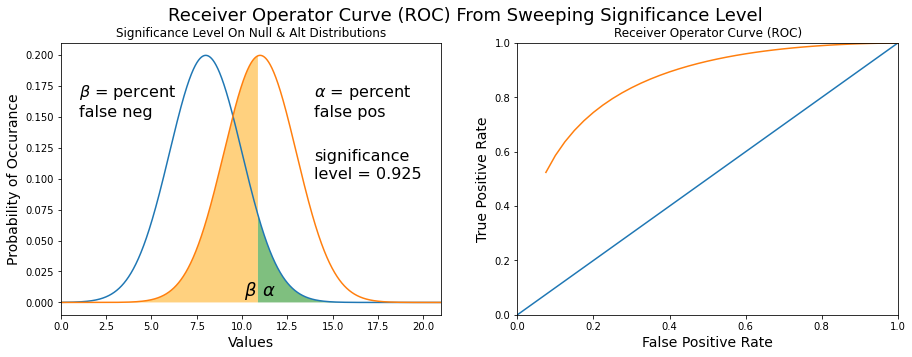

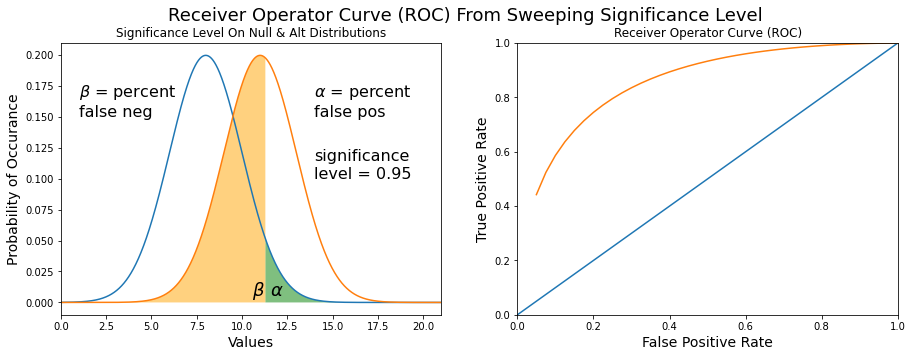

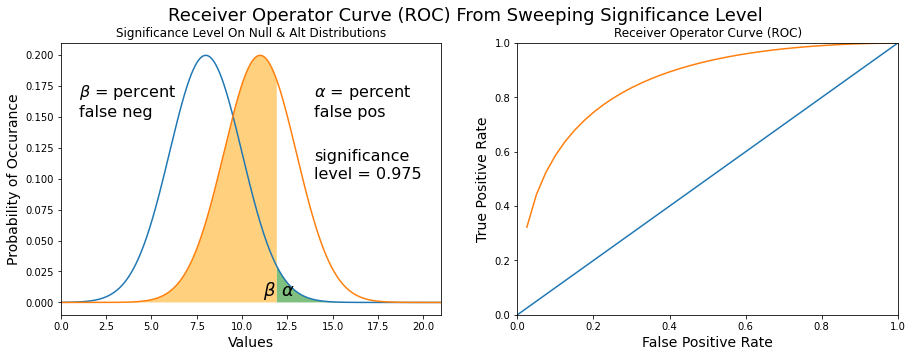

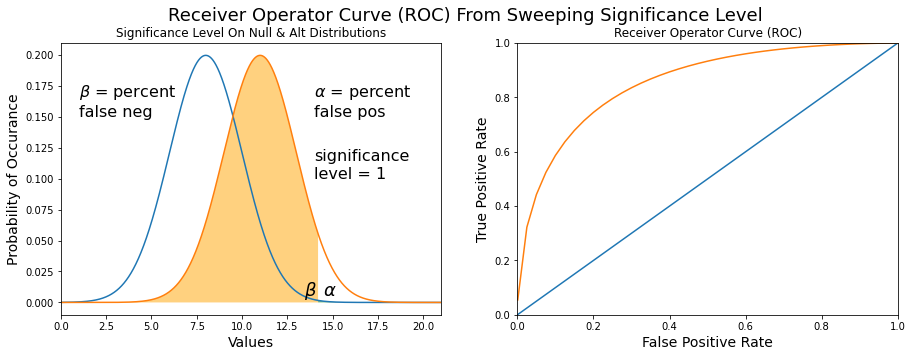

In [2]:
import matplotlib.pyplot as plt
import math
import time

def PDF(x, mean=0, std_dev=1):
    p = 1.0 / (std_dev * ((2 * math.pi) ** 0.5))
    p *= math.e ** (-0.5 * ((x - mean)/std_dev)**2)
    return p

pw = 1/1000
X = [(x + 0.5)*pw for x in range(22000)]
P1 = [PDF(x, 8, 2) for x in X]
P2 = [PDF(x, 11, 2) for x in X]

C1 = []
C2 = []
sum1 = 0
sum2 = 0
for i in range(len(X)):
    sum1 += P1[i]*pw
    sum2 += P2[i]*pw
    C1.append(sum1)
    C2.append(sum2)

ROC_X = []
ROC_Y = []
pts = 41
Sig_Levels = [(v * 100/(pts-1))/100 for v in range(0, pts)]

for sig_lev in Sig_Levels:
    if sig_lev == 1:
        sig_lev = 0.999
    for i in range(len(X)):
        if C1[i] > sig_lev:
            sig_i = i
            break

    if sig_lev == 0.999:
        sig_lev = 1

    TP_Rate = 1 - C2[sig_i]
    FP_Rate = 1 - C1[sig_i]

    ROC_X.append(FP_Rate)
    ROC_Y.append(TP_Rate)

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    ax1.plot(X, P1)
    ax1.plot(X, P2)

    msg = "Receiver Operator Curve (ROC) From Sweeping Significance Level"
    fig.suptitle(msg, fontsize=18)
    
    msg = "Significance Level On Null & Alt Distributions"
    ax1.set_title(label=msg)
    ax1.set_xlabel(xlabel="Values", fontsize=14)
    ax1.set_ylabel(ylabel="Probability of Occurance", fontsize=14)
    ax1.fill_between(X[sig_i:], 0, P1[sig_i:], facecolor='green', alpha=0.5)
    ax1.fill_between(X[:sig_i], 0, P2[:sig_i], facecolor='orange', alpha=0.5)

    ax1.text(1, 0.15, r'$\beta$ = percent'+'\nfalse neg',
            fontsize=16, ha='left')
    ax1.text(14, 0.15, r'$\alpha$ = percent'+'\nfalse pos',
            fontsize=16, ha='left')
    this_text = f'significance\nlevel = {round(sig_lev, 3)}'
    ax1.text(14, 0.10, this_text,
            fontsize=16, ha='left')

    ax1.text(X[sig_i] + 0.25, 0.005, r'$\alpha$', fontsize=18)
    ax1.text(X[sig_i] - 0.75, 0.005, r'$\beta$', fontsize=18)

    ax1.set_xlim([0, 21])

    ax2.plot([0, 1], [0, 1])
    ax2.plot(ROC_X, ROC_Y)
    ax2.set_title(label="Receiver Operator Curve (ROC)")
    ax2.set_xlabel(xlabel="False Positive Rate", fontsize=14)
    ax2.set_ylabel(ylabel="True Positive Rate", fontsize=14)
    ax2.set_xlim(0, 1)
    ax2.set_ylim(0, 1)
    plt.show()
    
    fig.savefig(f'hypo_{round(sig_lev, 3)}.png')
    time.sleep(0.2)